youtube video : https://www.youtube.com/watch?v=2XGSIlgUBDI&t=814s

code git : https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/blob/master/Untitled.ipynb

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_excel(r'C:\Users\rtekem\OneDrive - Vishay Intertechnology, Inc\Desktop\Machine_Learning_project\IMPUT\perrin-freres-monthly-champagne-.xlsx')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [9]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [11]:
df.isna().sum()

Month    1
Sales    2
dtype: int64

In [13]:
df = df.dropna()

In [15]:
df.isna().sum()

Month    0
Sales    0
dtype: int64

In [17]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [19]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [23]:
df.set_index('Month',inplace=True)

In [25]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [27]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

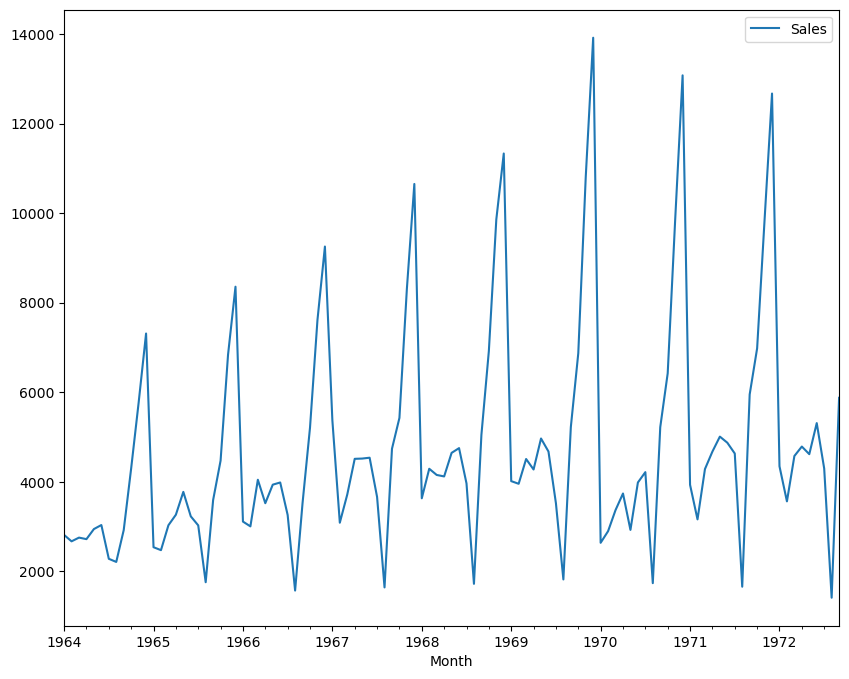

In [29]:

df.plot()

In [33]:
from statsmodels.tsa.stattools import adfuller

for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

Sales - Series is not Stationary


In [35]:
from statsmodels.tsa.stattools import kpss
for i in range (len(df.columns)):
    result = kpss(df[df.columns[i]])
    if result[1] < 0.05 :
     print('{} - Series is not Stationary'.format(df.columns[i]))
    else:
     print('{} - Series is Stationary'.format(df.columns[i]))

Sales - Series is not Stationary


In [41]:
#df_diff = df.diff().dropna()# Différenciation de premier ordre
df_diff = df.diff()

In [43]:
df_diff

,Sales
Month,
1964-01-01,NaN
1964-02-01,-143.0
1964-03-01,83.0
1964-04-01,-34.0
1964-05-01,225.0
...,...
1972-05-01,-170.0
1972-06-01,694.0
1972-07-01,-1014.0


In [45]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [47]:
df

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [49]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [51]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [55]:
df = df.dropna()

In [57]:
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

Sales - Series is not Stationary
Sales First Difference - Series is Stationary
Seasonal First Difference - Series is Stationary


array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
       <Axes: xlabel='Month'>], dtype=object)

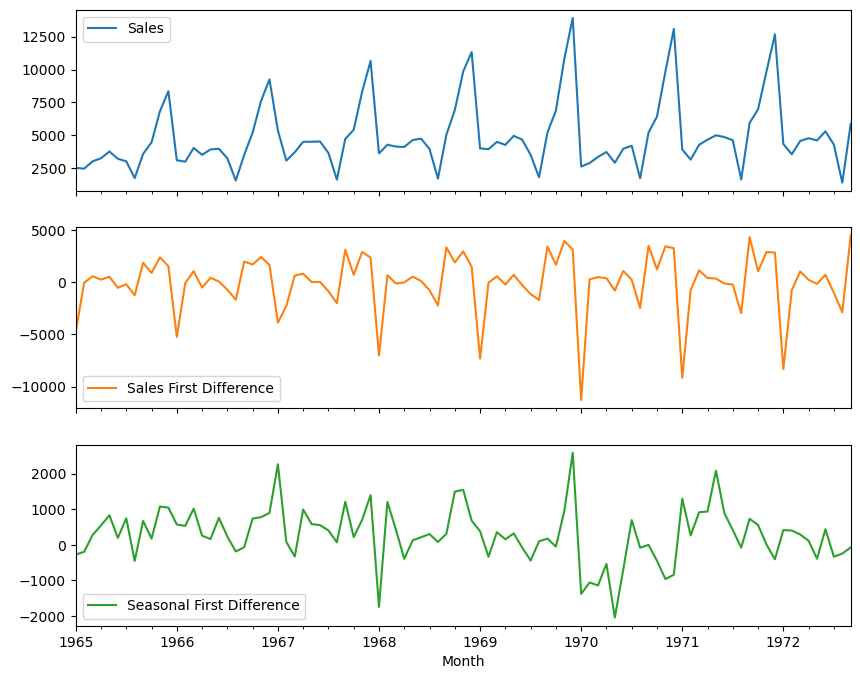

In [59]:
df.plot(subplots=True)

Auto Regressive Model
image.png

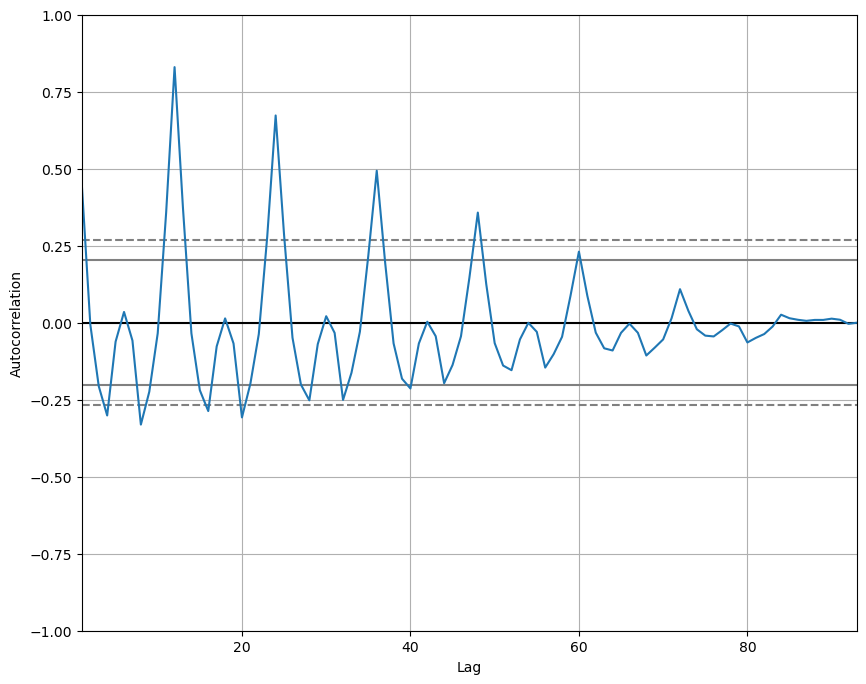

()

In [67]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# Exemple d'utilisation
autocorrelation_plot(df['Sales'])
plt.show()
()

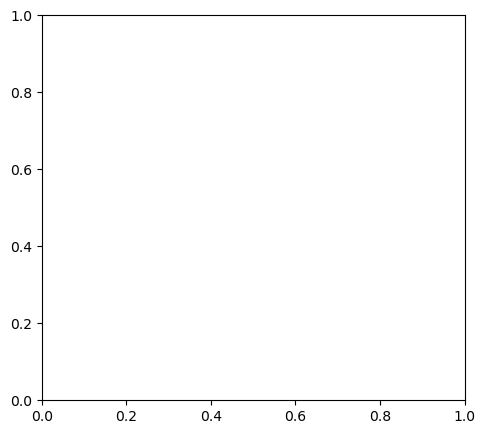

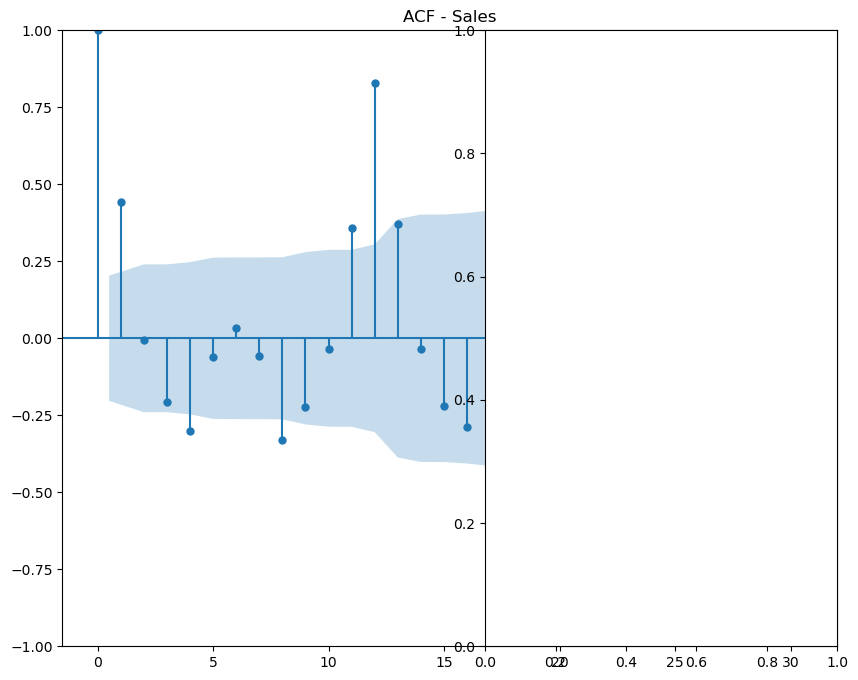

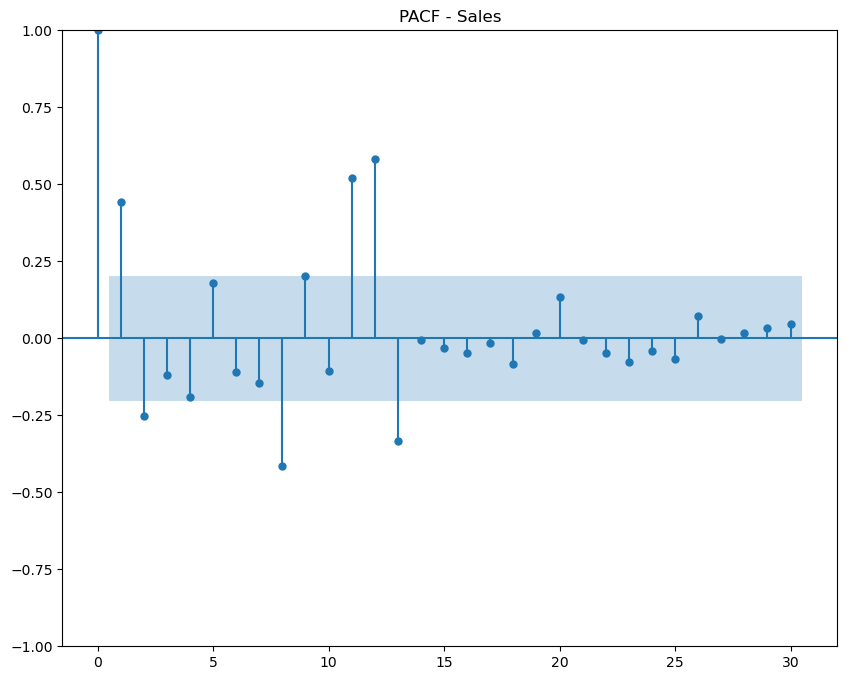

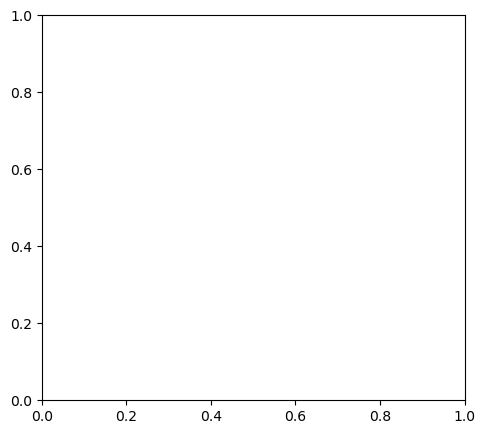

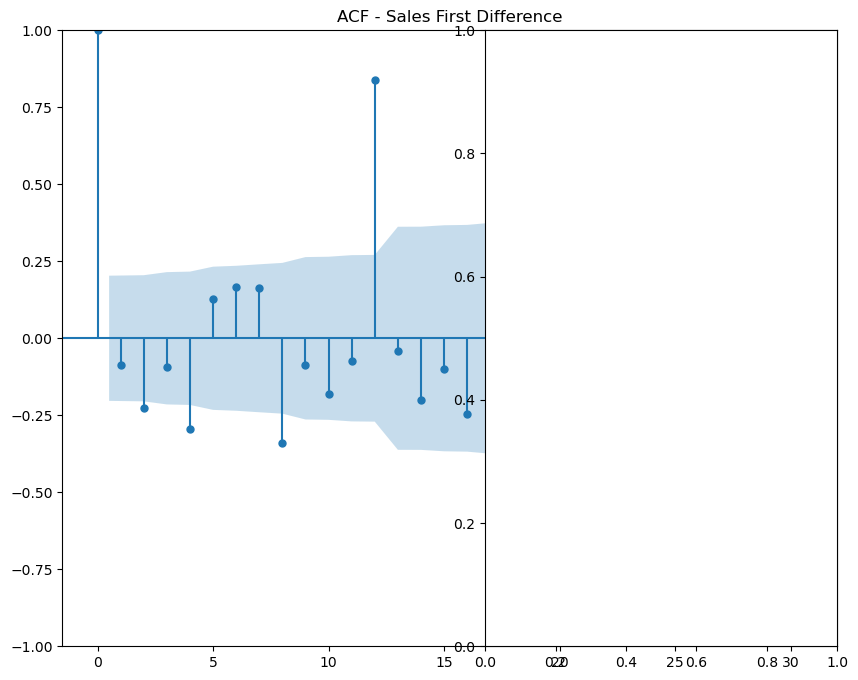

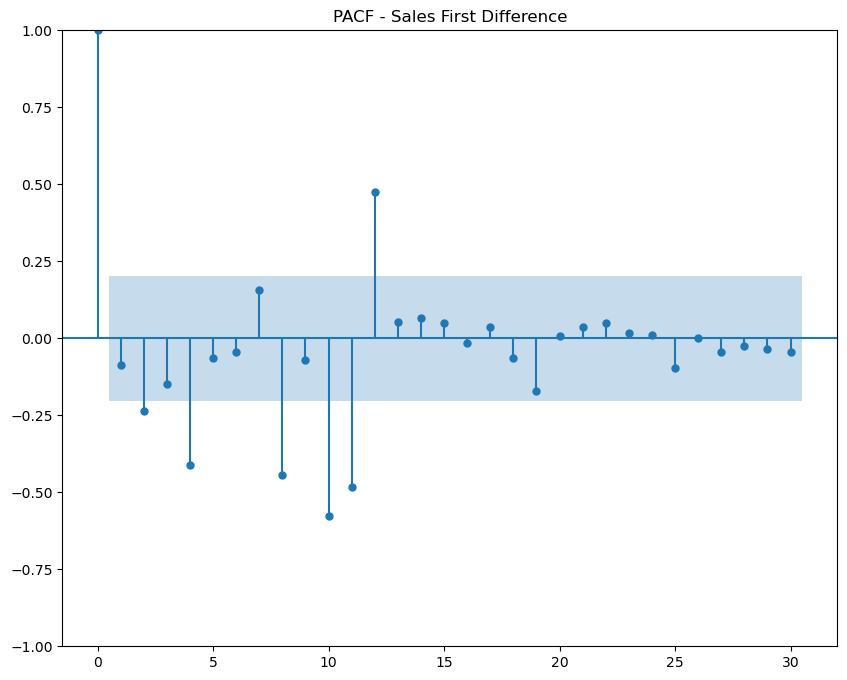

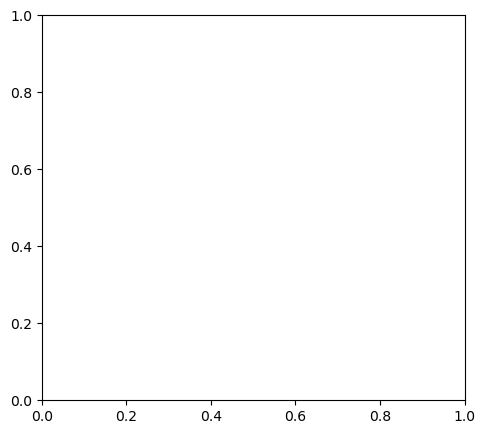

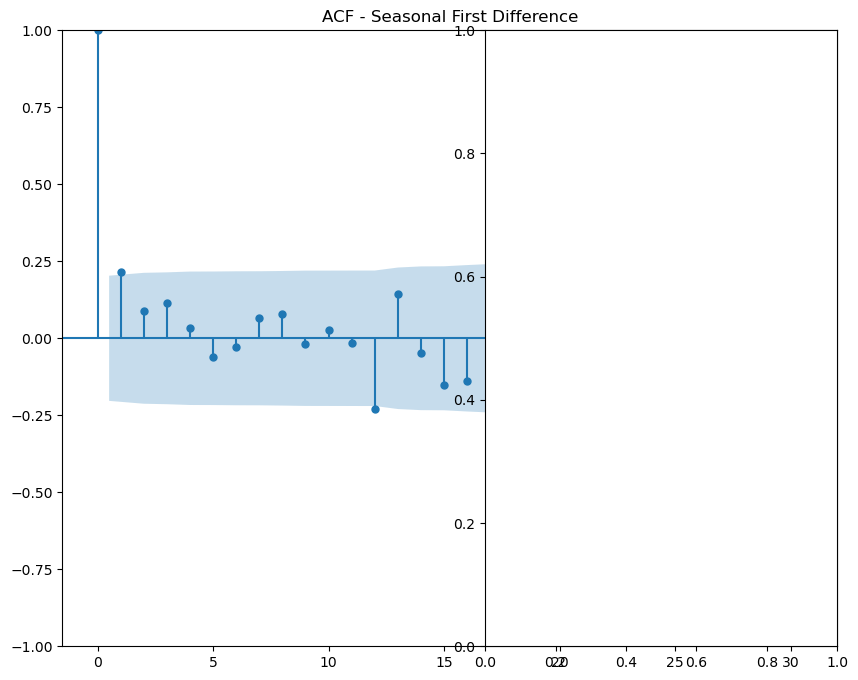

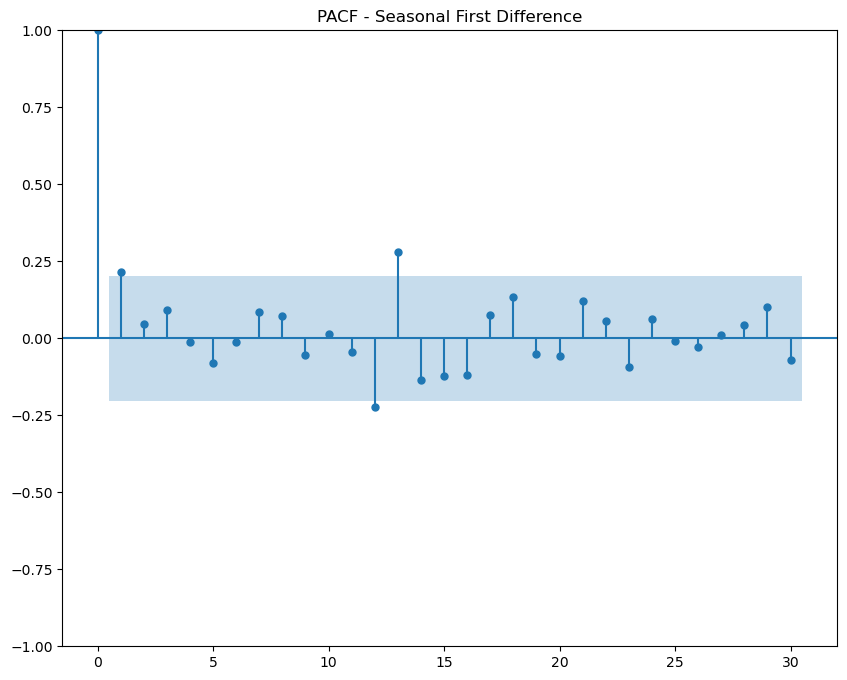

In [71]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

for col in df.columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plot_acf(df[col].dropna(), lags=30, title=f"ACF - {col}")
    plt.subplot(1, 2, 2)
    plot_pacf(df[col].dropna(), lags=30, title=f"PACF - {col}")
    plt.show()


In [81]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustement du modèle ARIMA
model = ARIMA(df['Sales'], order=(1,1,1))
model_fit = model.fit()

# Affichage du résumé du modèle
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -846.679
Date:                Thu, 03 Apr 2025   AIC                           1699.358
Time:                        18:38:15   BIC                           1706.924
Sample:                    01-01-1965   HQIC                          1702.412
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4711      0.050      9.480      0.000       0.374       0.568
ma.L1         -0.9995      0.133     -7.530      0.000      -1.260      -0.739
sigma2      5.559e+06   2.44e-08   2.27e+14      0.0

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


C:\Users\rtekem\AppData\Local\Temp\ipykernel_31164\3034871841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)


<Axes: xlabel='Month'>

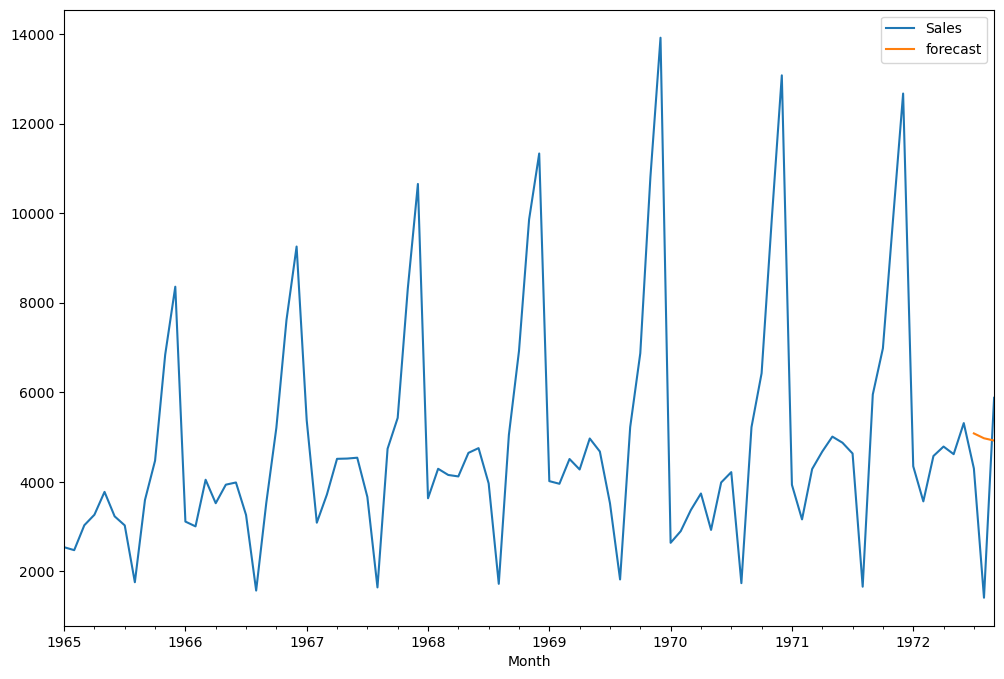

In [83]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [85]:
import statsmodels.api as sm

In [87]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


C:\Users\rtekem\AppData\Local\Temp\ipykernel_31164\3641817285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast']=results.predict(start=80,end=103,dynamic=True)


<Axes: xlabel='Month'>

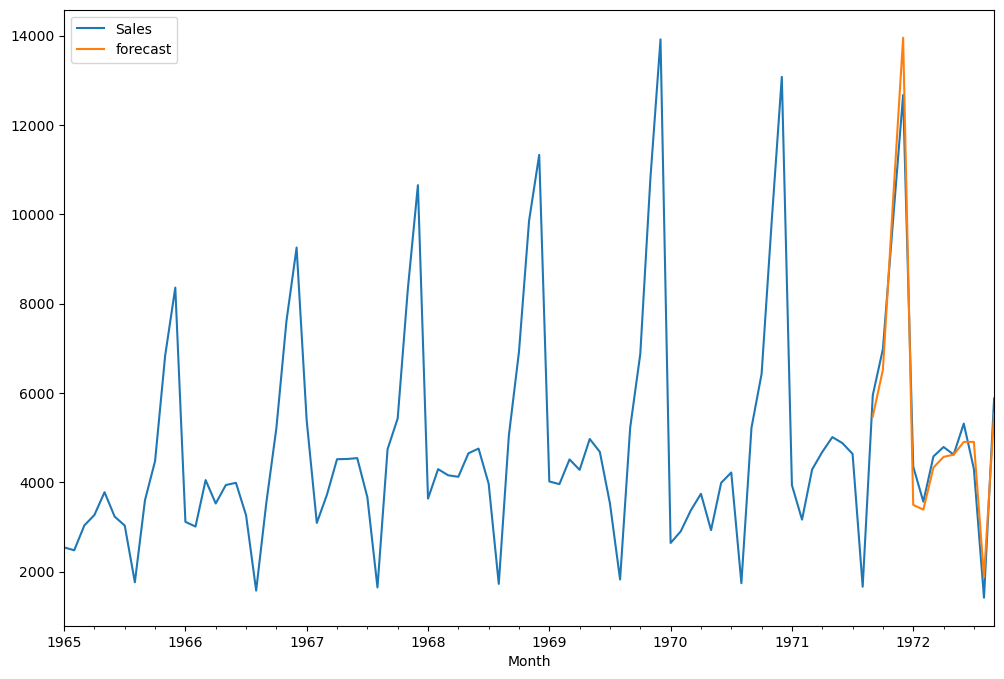

In [95]:
df['forecast']=results.predict(start=80,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [99]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [101]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [103]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [105]:
future_df=pd.concat([df,future_datest_df])

C:\Users\rtekem\AppData\Local\Temp\ipykernel_31164\1723908026.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


<Axes: >

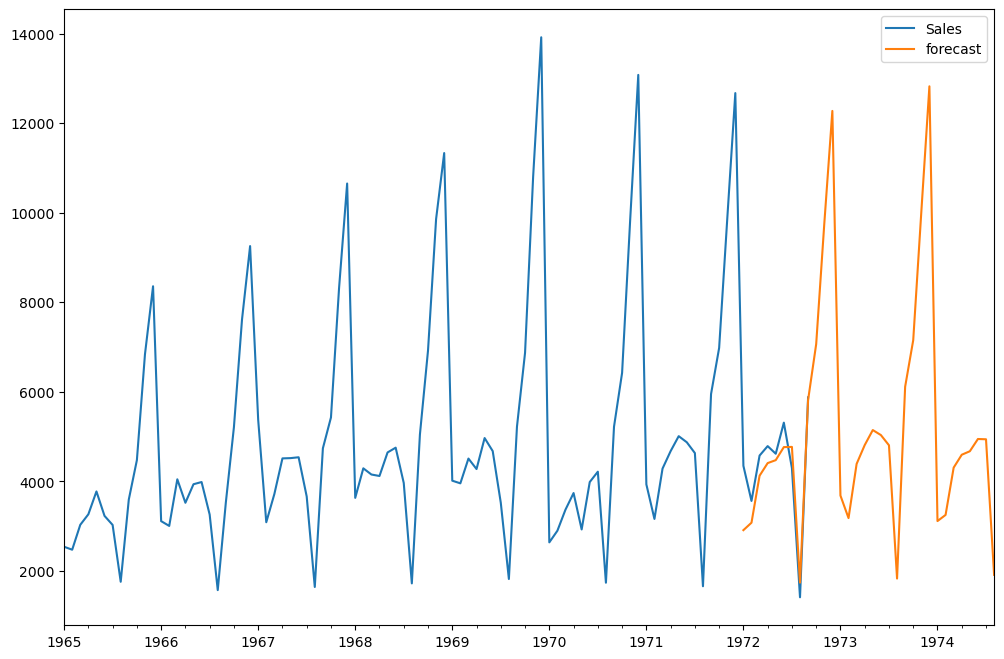

In [109]:
future_df['forecast'] = results.predict(start = 84, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))